# Project: Medical appointment No-shows Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analyzing the Medical Appointment No Shows dataset which collects information from 100k medical appointments in Brazil. I'm interested in finding trends among the patients who showed up at the doctor's appointment and how they differ from the no-show patients. 

**First, I will import all the packages needed and use the magic command to ensure graphs are displayed within the Jupyter notebook.** 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from datetime import datetime
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Load the dataset using panda's read_csv() function and save the dataframe into the variable: df 

In [92]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

Inspect the first three rows of the dataset.

In [93]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


We see that the dataset has been correctly loaded. Each row represents a patient's appointment. The column names are mostly self-explainatory. The 'ScheduledDay' column is the date that the appointment was scheduled by the patient. And the 'AppointmentDay' is the actual appointment date. The ‘Neighborhood’ column indicates the location of the hospital. And the ‘Scholarship’ column indicates whether or not the patient is enrolled in Brasilian welfare program: Bolsa Família. 'SMS_received' column indicates whether the patient received a text message reminder. The value '0' represents 'No', and the value '1' represents 'yes' for the columns: 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',	'Handcap', 'SMS_received'. And the 'No-show' column records whether the patient had a no show for this particular appointment. 

Next we look at the dataset and see how many rows and columns it has.

In [94]:
df.shape

(110527, 14)

Result shows: the dataset has 110527 rows and 14 columns. 

The next two questions would be: Are there any missing values in the dataset? Are the data types for each column correct?

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Interestingly, for every column there are 110527 values, and it matches the total row number. This means: there are no missing values for this data set. As for data types, the 'ScheduledDay' and 'AppointmentDay' columns will need to be parsed into datetime format. Also, I will convert the 'No-show' column into integer datatype, with 1 for no show and 0 for showed up. 

What about duplicated rows?  

In [96]:
sum(df.duplicated())

0

Amazingly, there are no duplicated rows in this dataset. 

Let's take a look at the summary statistics of the numeric columns and see if there are any data quality issues. 

In [97]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that for this dataset, the mean and median age is around 37 years old, and about 50% of the patients fall between the age 18 to 55. The maximum age is '115' which is possible. But the minimum age of '-1' is definitely not possible. From the 'Scholarship' column, we also see that about 9.8% of the patients are enrolled in the Brasilian welfare program: Bolsa Família.  Data also shows 19.7% of the patients have hypertension. 3% of the patients has problem with Alcohol, and 2% are hadicap. On average, 32% of the patients received text messages reminders for the medical appointment. Looking at the Handcap column, we see the maximum values is: 4 which does not make sense as data within this column are coded as '0' or '1', representing 'No' and 'Yes'. We will further address this issue in the data cleaning section. 

### Data Cleaning 

After looking at the general properties of our dataset, we discovered several issues which require some data cleaning.

To do list:

1. Change the data type for column: 'ScheduledDay' and 'AppointmentDay' from 'object' to 'datetime index'. 

2. Change the 'No-show' column datatype from 'object' to 'int64'. 

3. Drop row(s) with the age column < 0. (We noticed the minimum age in the dataset was '-1')

4. Drop row(s) with the 'Handcap' column value > 1. (We noticed the maximum Handcap in the dataset was '4') 

5. Drop the 'PatientId'	and 'AppointmentID' columns, as we don't need them for our analysis. 

6. Change all column names into lowercases, replace '-' with lower '_'. 

7. Create a new dataframe column 'days_diff' which will be the value of each 'AppointmentDay' minus 'ScheduledDay' in days.	

**First, we will change the data type for column: 'ScheduledDay' and 'AppointmentDay' from 'object' to 'datetime index'.** 

I will create a column list including the two columns: 'ScheduledDay' and 'AppointmentDay', and use a for loop and the panda's to_datetime() function to change the two columns at once.

In [98]:
col_list = ['ScheduledDay', 'AppointmentDay']
for c in col_list:
    df[c] = pd.to_datetime(df[c])

**Next, we will fix the 'No-show' column datatype and convert it into 'int64' format.** 

In order to do so, we will need to find out how the 'No-show' column is coded. 

In [99]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

The results indicated there are only 'No' and 'Yes' two kinds of values in the 'No-show' column. 

Then we will use a numpy function: np.where() to convert the 'object' datatype into 'int64' for the 'No-show' column. 

We will code the 'No' value as 0, and the 'Yes' value as 1. 

In [100]:
df['No-show'] = np.where(df['No-show'] == 'No', 0, 1).astype(int)

Now it is time to check the column datatypes again to verify the 'ScheduledDay' and 'AppoinmentDay' column has been changed to datetime index, and also confirm the 'No-show' column has been converted into integer datatype. 

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 11.8+ MB


As we can see, the datatype changes are confirmed. 

**Next is to find how many rows are there with the age column value < 0.**

In [102]:
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0


It seems that the only row with 'Age < 0' is the one with Age of '-1'. So let's drop this row. 

As we know this row's index is: 99832, we can directly use it for dropping the row as below. 

In [103]:
df.drop(99832, inplace = True)

Let's check if the row was correctly dropped by querying again for age column value < 0. 

In [104]:
df.query('Age < 0') 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


No observation was returned, indicating the negative age row has been successfully dropped from the dataset. 

**What about the rows with 'Handcap' column value > 1? How many are there?** 

In [105]:
df.query('Handcap > 1') 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14 09:26:08,2016-04-29,94,BELA VISTA,0,1,1,0,2,1,0
1665,1.242919e+13,5525497,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,1,0
1666,1.242919e+13,5525498,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,0
2071,1.242919e+13,5640120,M,2016-04-29 10:08:48,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,0,0
2091,1.491829e+13,5638626,F,2016-04-29 08:13:59,2016-04-29,11,ANDORINHAS,0,0,0,0,2,0,0
2213,3.423831e+09,5640766,F,2016-04-29 11:22:50,2016-04-29,29,VILA RUBIM,0,0,0,0,2,0,0
2214,2.754718e+12,5640760,M,2016-04-29 11:22:20,2016-04-29,55,DO QUADRO,0,0,0,0,3,0,0
2673,4.415275e+13,5589893,M,2016-04-15 13:06:05,2016-04-29,17,SANTA TEREZA,0,0,0,0,2,1,0
5424,1.647280e+12,5647342,M,2016-05-02 13:24:36,2016-05-04,65,SANTO ANDRÉ,0,1,1,1,2,0,1
5467,4.555225e+12,5689883,F,2016-05-12 09:10:28,2016-05-16,10,BENTO FERREIRA,0,0,0,0,2,0,0


The result showed that there are 199 rows with 'Handcap' column value > 1, with coding of '2', '3' and '4'. 

As I didn't find any related information from the orginal dataset description for 'Handcap' coded as '2', '3', '4', we will drop these 199 rows. Compared to the size of the dataset: 100k rows, 199 is a relatively small number. Dropping these rows would likely have little impact on our analysis. Again, we will use a list of row indexes for the row dropping.

In [106]:
df.drop(df.query('Handcap > 1').index, inplace=True)

It is always good to verify whether the drop was successful. 

In [107]:
df.query('Handcap > 1') 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


And from the query above, we confirmed that all rows with 'HandCap' > 1 have been dropped accordingly.

**Next is to drop the 'PatientId'	and 'AppointmentID' columns as we don't need them for our analysis. We do need to specify 'axis = 1' in the drop funtion for column dropping.** 

In [108]:
df.drop(['PatientId', 'AppointmentID'], axis= 1, inplace = True)

Now, let's verify the column drop. 

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110327 non-null object
ScheduledDay      110327 non-null datetime64[ns]
AppointmentDay    110327 non-null datetime64[ns]
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hipertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null int64
dtypes: datetime64[ns](2), int64(8), object(2)
memory usage: 10.9+ MB


We see that the 'PatientId', 'AppointmentID' columns have been dropped out from our dataframe. Now the dataset has 12 columns in total (instead of 14 columns before the drop). 

Also, the row numbers has decreased from the original 110527 to 110327 as we dropped 199 rows ('Handcap' > 1) + 1 row (Age of '-1').

**I will then change all column names into lowercases and replace '-' with '_' within the column names. We will use panda's rename function and pass in a lambda function to do so.**

In [110]:
df.rename(columns= lambda x: x.lower().replace('-', '_'), inplace= True)

Let's check out the column names again to see if the renaming worked.

In [111]:
for i, v in enumerate(df.columns):
    print(i, v)

0 gender
1 scheduledday
2 appointmentday
3 age
4 neighbourhood
5 scholarship
6 hipertension
7 diabetes
8 alcoholism
9 handcap
10 sms_received
11 no_show


As we can see, all the column names are in lower case now. 

**For the last step of data cleaning, I will create a new dataframe column: 'days_diff' which is the difference in days between 'appointmentday' and 'scheduledday'.** 

We will need to subtract 'scheduledday' column values from 'appointmentday' column values, present the differences as absolute values and convert it into 'timedelta64[D]' datatype to get the differnece in days. Then, we assign this pandas series to a new dataframe column 'days_diff'.  

In [112]:
df['days_diff'] = abs(df.appointmentday - df.scheduledday).astype('timedelta64[D]')

Let's check whether the 'days_diff' column was created correctly. We can select the last 5 records of the dataframe with the columns 'scheduledday', 'appointmentday', 'days_diff '.

In [113]:
df.tail()[['scheduledday', 'appointmentday', 'days_diff']]

,scheduledday,appointmentday,days_diff
110522,2016-05-03 09:15:35,2016-06-07,34.0
110523,2016-05-03 07:27:33,2016-06-07,34.0
110524,2016-04-27 16:03:52,2016-06-07,40.0
110525,2016-04-27 15:09:23,2016-06-07,40.0
110526,2016-04-27 13:30:56,2016-06-07,40.0


Results showed that the 'days_diff' column has been created and the difference (in days) between the appointment scheduled day and actual appointment day was calculated correctly. 

 Now we are ready to do some exploratory data analysis!

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Can text message reminders help to decrease the no-show rate?)

**The first question I have is: Can text message reminders help to decrease the no-show rate? I assume that by receiving mobile text message reminders, patients may have lower rate of no-shows for their medical appointment.**

Let's first look at the no-show value counts and the mean no-show rates for the overall dataset. Remember that no-shows are coded as '1' and '0' means the patient made it to the appointment. 

In [114]:
show_count = df.no_show.value_counts()
show_count

0    88049
1    22278
Name: no_show, dtype: int64

In [115]:
np.mean(df.no_show)

0.20192699883074861

It seems that for the >100k medical appointments, there are 22278 events of no-shows and 88049 events of patient showing up. The average no-show rate is around 20% which can be visualized in a pie chart as below. 

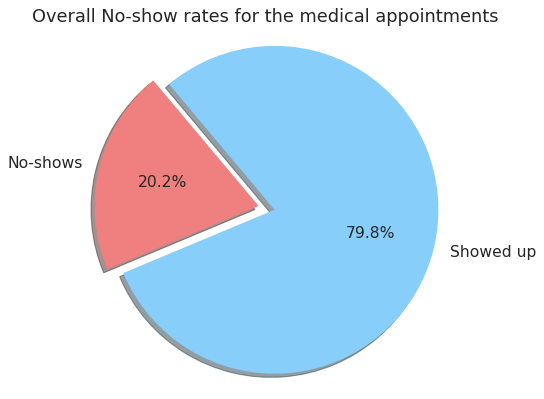

In [116]:
# We will use matplotlib to construct a pie chart to visualize the overall no-show rate for the medical appointments.

labels = 'No-shows', 'Showed up'
sizes = [show_count[1], show_count[0]]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)   # only "explode" the 1st slice: No-shows

plt.figure(figsize=(8, 6), dpi=80)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=130, textprops={'fontsize': 14})
plt.axis('equal') # Equal aspect ratio will ensure the pie chart is drawn as a circle
plt.title('Overall No-show rates for the medical appointments', fontsize= 16); 

The next question would be: how many appointments sent out text message reminders? 

In [117]:
df.sms_received.value_counts()

0    74892
1    35435
Name: sms_received, dtype: int64

Data shows that 35435 of reminders were sent out to patients, which is around 32% of all appointments. 

To explore whether the text message could decrease the no-show rate, we can group by the 'sms_received' column, and compare the mean no-show rates. 

In [118]:
sms_show_rate = df.groupby('sms_received')['no_show'].apply(np.mean)
sms_show_rate

sms_received
0    0.166947
1    0.275857
Name: no_show, dtype: float64

Surprisingly, we see that for appointments with text message reminders sent, the no-show rate is around 27.5%, higher than the 16.6% no-show rate without text message reminders. Let's visualize the differnce in a barchart as below.

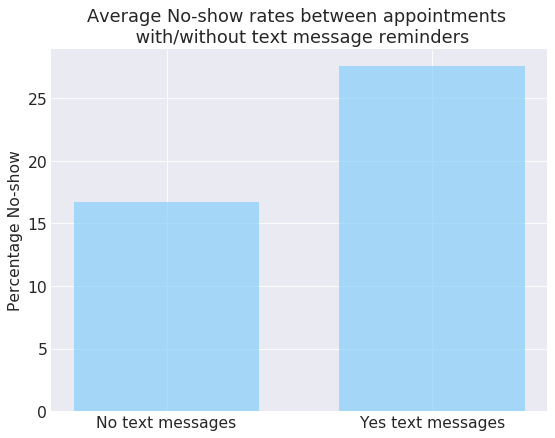

In [119]:
x_labels = ('No text messages', 'Yes text messages')
x_pos = [1, 2]
no_show_rates = [sms_show_rate[0]*100, 
                 sms_show_rate[1]*100]

plt.figure(figsize=(8, 6), dpi=80)
plt.bar(x_pos, no_show_rates, align='center', alpha=0.7, color = 'lightskyblue', width = 0.7)
plt.xticks(x_pos, x_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Percentage No-show', fontsize=14)
plt.title('Average No-show rates between appointments \n with/without text message reminders', fontsize=16); 

 **As we can see, patients who received text message reminders tend to have higher no-show rates! Compared to the patients who didn't receive text message reminders. And the average no-show rate is about 10% higher for patients who received text reminders.**

### Research Question 2  (Would the number of days between the appointment day and scheduled day affect the no-show rate? )

In the data cleaning section, we created a new column: 'days_diff' which calculates the difference in number of days between the actual appointment date and appointment scheduled date. I'm interested in finding out whether people who made appointments well in advance would have a higher no-show rate. In other words, I assume that a larger number in 'days_diff' may correlate with higher no-show rates. 

First, let's explore the 'days_diff' distribution with some summary statistics. 

In [120]:
df.days_diff.describe()

count    110327.000000
mean          9.536025
std          15.030540
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: days_diff, dtype: float64

Very interestingly, we see that at least 25% of all appointments were made at the same day of the actual appointment. And 50% of all appointments were scheduled within 3 days from the actual appointment date. Most appointments were scheduled within 14 days from the appointment date. And the maximum difference in days was 178 days, indicating the appointment was made around 6 months in advance!  

Next, let's plot a histogram of the 'days_diff' to visualize the distribution of the difference in days. 

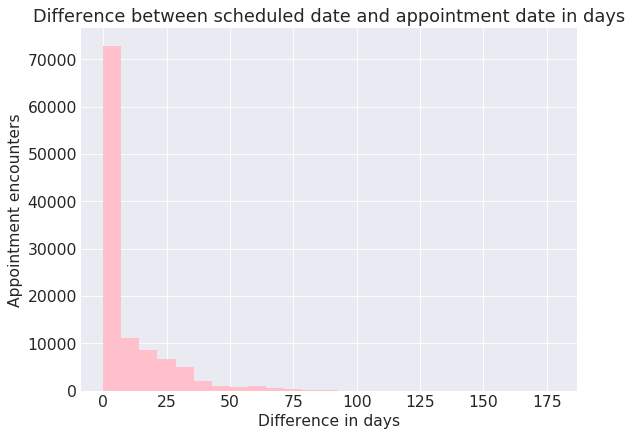

In [121]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df.days_diff, bins = 25, facecolor= 'pink');
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Difference in days', fontsize=14)
plt.ylabel('Appointment encounters', fontsize=14)
plt.title('Difference between scheduled date and appointment date in days', fontsize=16); 

As we can see, most of the patients scheduled their appointments very close to the actual appointment date. The distribution is skewed to the right. Very few appointments were scheduled more than 75 days in advance. 

For our analysis, I will create a new column which separates the 'days_diff' values into four bins using the summary statistics above. More specifically, I will use Panda's cut function to organize the 'days_diff' values into four category: 0 days, 1-3 days, 4-14 days and 15-178 days. For the cutting points, I will use a list: [-1, 0, 3, 14, 178] as below. The reason for starting the cut from -1 is that for the cut function, we can't use the same cutting points as from 0 to 0. Any number below 0 would work for the start cutting point. 

In [122]:
df['diff_bins'] = pd.cut(df.days_diff, bins= [-1, 0, 3, 14, 178], labels= ['0', '1-3', '4-14', '15-178'])

Next, we check the value counts for our newly created column 'diff_bins'. I reindexed the returned series so the difference in days would have an assending order: 0 days, 1-3 days, 4-14 days and 15-178 days.  

In [123]:
df.diff_bins.value_counts().reindex(['0', '1-3', '4-14', '15-178'])

0         43689
1-3       14725
4-14      25708
15-178    26205
Name: diff_bins, dtype: int64

We can see that the grouping was successful and there were 43689 of same day appointments.

Now it is time to compare the no-show rates between the four groups. We can use panda's groupby function do to so. First, we groupby the column 'diff_bins' and then calculate the mean no-shows for each group. 

In [124]:
rates_bin = df.groupby('diff_bins')['no_show'].apply(np.mean)
rates_bin

diff_bins
0         0.066332
1-3       0.235925
4-14      0.285514
15-178    0.326884
Name: no_show, dtype: float64

Very interestingly, we see that for people with same day appointments (the scheduled day is the same as the actual appointment day), there is only 6.6% of no-show rate which is much lower than the 20% average no-show rate. However in the 1-3 day group (which means the patient made the appointment 1 to 3 days in advance), the no-show rate increased to 23.6%! The no-show rate continues to rise in the 4-14 days group at 28.5% and in the 15-178 days group at 32.7%. 

Let's visualize the changes of no-shows using a barchart as below.

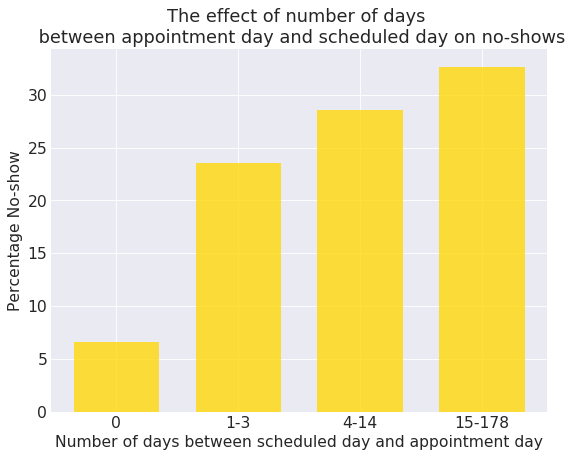

In [125]:
x_labels = ('0', '1-3', '4-14', '15-178')
x_pos = [1, 2, 3, 4]
rates = [rates_bin[0]*100, 
         rates_bin[1]*100,
         rates_bin[2]*100,
         rates_bin[3]*100]

plt.figure(figsize=(8, 6), dpi=80)
plt.bar(x_pos, rates, align='center', alpha=0.77, color = 'gold', width = 0.7)
plt.xticks(x_pos, x_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of days between scheduled day and appointment day', fontsize=14)
plt.ylabel('Percentage No-show', fontsize=14)
plt.title('The effect of number of days \n between appointment day and scheduled day on no-shows', fontsize=16); 

**As we can see, the number of days between scheduled day and appointment day may play a role in the no-show rates. It seems that people who made appointments well in advance would tend to have a higher no-show rate.**

### Research Question 3  (Do different age groups have effects on the no-show rate?)


Finally, I will look at the age group's effect on the no-show rate. Let's start by looking at the age distribution of the dataset with some summary statistics.

In [126]:
df.age.describe()

count    110327.000000
mean         37.070753
std          23.098052
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

As we can see, the mean and median age is both 37 years old. The minimum age is 0 which represents new born babies, and the maximum age is 115. Most of the ages are between 18 years old and 55 years old. Let's plot a histogram to visualize the age distribution. 

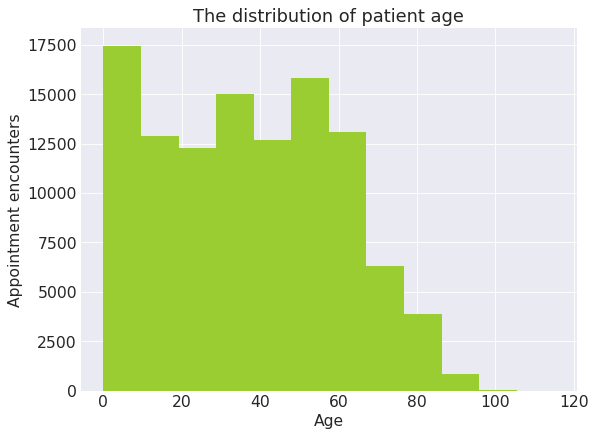

In [127]:
plt.figure(figsize=(8, 6), dpi=80)
plt.hist(df.age, bins = 12, facecolor= 'yellowgreen');
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Appointment encounters', fontsize=14)
plt.title('The distribution of patient age', fontsize=16); 

From the histogram we see that the age range 0-10 years old had the most appointment encounters. And starting from age 70, the appointment encounters formed a strong decreasing trend. 

Next, let's compare the mean ages between the no-show patients and the patients who showed up for their appointments. 
We can groupby the 'no_show' column, select the 'age' column and look at the summary statistics.

In [128]:
df.groupby('no_show')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
no_show,,,,,,,,
0,88049.0,37.777090,23.330356,0.0,18.0,38.0,56.0,115.0
1,22278.0,34.279109,21.935121,0.0,16.0,33.0,51.0,115.0


We see that the mean age for no-show patients is 34 years old, while the mean age for patients who showed up is 38 years old. Majority of the no-show patient's age fall between 16-51 years old, while majority of the showed up patient's age fall between 18-56 years old. Let's visualize the distribution of age by 'no_show' using a box-plot. 

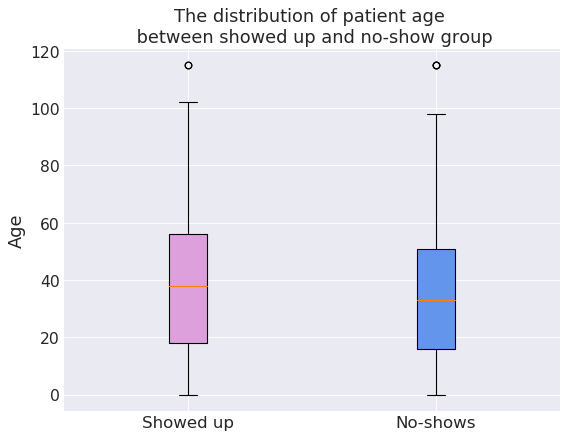

In [129]:
plt.figure(figsize=(8, 6), dpi=80)
bp = plt.boxplot([ df[df.no_show == 0]['age'], df[df.no_show == 1]['age']], 
                 patch_artist=True, labels= ['Showed up', 'No-shows'])
bp['boxes'][0].set_facecolor('plum')
bp['boxes'][1].set_facecolor('cornflowerblue')

plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Age', fontsize=16)
plt.title('The distribution of patient age \n between showed up and no-show group', fontsize=16); 


The distribution of age between the showed up and no-show group looks very similar. What if we separate the ages into four bins using the summary statistics? Would the age sub-groups show difference in no-show rates? 

In [130]:
df.age.describe()

count    110327.000000
mean         37.070753
std          23.098052
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

We will use panda's cut function to create a new column 'age_bins' for the dataframe using the minimum, 25%, 50%, 75% and maximum age as the cut off point.

In [131]:
df['age_bins'] = pd.cut(df.age, bins=[0, 18, 37, 55, 115], labels=['0-18', '19-37', '38-55', '56-115'], include_lowest= True)

Let's verify the new column created and reindex the columns.

In [132]:
df.age_bins.value_counts().reindex(['0-18', '19-37', '38-55', '56-115'])

0-18      28819
19-37     27212
38-55     26870
56-115    27426
Name: age_bins, dtype: int64

We can see that the new column was created successfully and within each bin there is more than 26000 age counts.

Now it is time to compare the no-show rates between the four age groups. We can use panda's groupby function do to so. First, we groupby the column 'age_bins' and then calculate the mean no-show rate for each group.

In [133]:
age_bin = df.groupby('age_bins')['no_show'].mean()
age_bin

age_bins
0-18      0.219994
19-37     0.235484
38-55     0.195274
56-115    0.156166
Name: no_show, dtype: float64

The results indicated that patients within the 56-115 age group have a lower no-show rate of 15.6%. The age group of 38-55 have a no-show rate of 19.5% which is lower than the average 20.2%. While the age group 0-18 and 19-37 all have higher no-show rates. 

Let's visualize this trend in a bar chart. 

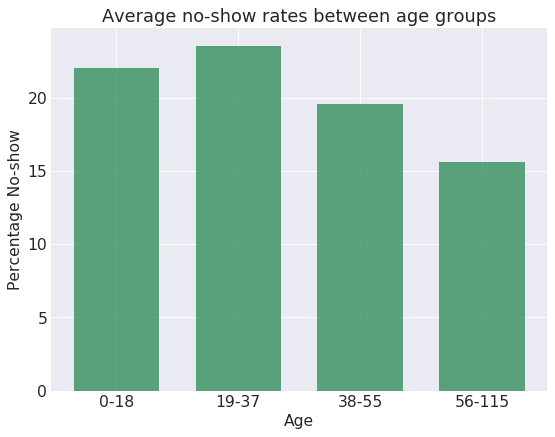

In [134]:
x_labels = ('0-18', '19-37', '38-55', '56-115')
x_pos = [1, 2, 3, 4]
nrates = [age_bin[0]*100, 
          age_bin[1]*100,
          age_bin[2]*100,
          age_bin[3]*100]

plt.figure(figsize=(8, 6), dpi=80)
plt.bar(x_pos, nrates, align='center', alpha=0.77, color = 'seagreen', width = 0.7)
plt.xticks(x_pos, x_labels, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Percentage No-show', fontsize=14)
plt.title('Average no-show rates between age groups', fontsize=16); 

**From the barchart, we see the no-show rate goes up from the age group 0-18 to age group 19-37. And then the no-show rate forms a down trend as the age increase. Age group 56-115 have the lowest no-show rate of: 15.6%.** 

<a id='conclusions'></a>
## Conclusions

In this project, I analyzed the medical no-shows appointment dataset to identify trends that would affect appointment no-show rates. I looked at whether text message reminders, days between appointment scheduled day and actual appointment day, and age could affect the no-show ratings. To my surprise, I found that people who did receive a text message reminder had a higher 10% no-show rate on average. This indicates text message reminders may not play an important role in lowering the no-show rate. Next, I looked at whether the number of days between the appointment day and scheduled day would affect the no-show rate. I created a new dataset column to calculate the difference in days, and then grouped them into four bins using summary statistics. My data showed that patients who had same day appointments (the scheduled day and appointment day are on the same day) had the lowest no-show rate of 6.6%. And as the difference in days increase, the no-show rate forms a increasing trend to above the average 20.2%. This suggests that the time between appointment scheduled day and actual appointment day may play a role in the no-show ratings. Last, I investigated whether patient's age would affect the no-show rate. Although the distribution of age looks similar between the no-shows and the patients who showed up, grouping the age into various age groups provided more insights. Interestly, the age group 56-115 had the lowest no-show rate of 15.6% and age group 38-55 had slightly lower than average no-show rates. This may indicate that older people might need more care and tend not to miss their appointments. 


**Limitations**

There are several limitations to my exploration and analysis. First, I only used summary statistics for my analysis and didn't perform any inferential statistics or machine learning to draw conclusions. Second, there are several other independent variables such as whether the patiend had Diabetes or Alcoholism which I didn't explore. They may play a role in the no-show rates as well. Third, multivairate exploration of 3 or more variables at the same time was not done in this analysis. As I continue to learn at Udacity, I will come back and work on this project again to address these limitations. 


**List of Websites I used in creating my submission**

https://stackoverflow.com

https://matplotlib.org

https://seaborn.pydata.org/

  
  

## Thank you! 😊



In [135]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0